In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from imageio import imread
import pickle
import tensorflow as tf

from src.data import augment_data, jitter, flip_lr

In [2]:
img = imread('/home/ben/Workspace/embc_2020_auto/data/external/i000qa-fn.jpg')
coords = np.loadtxt('/home/ben/Workspace/embc_2020_auto/data/external/i000qa-fn.txt')

with open('/home/ben/Workspace/embc_2020_auto/data/muct/muct_noses.pkl', 'rb') as _f:
    boxes = pickle.load(_f)

In [3]:
rect = list(boxes['i000qa-fn.jpg'])
# rect[0] /= img.shape[1]
# rect[1] /= img.shape[0]
# rect[2] /= img.shape[1]
# rect[3] /= img.shape[0]
rect = rect[:2]

In [4]:
img = np.array([img, img, img])
coords = np.array([coords, coords, coords])
rect = np.array([rect, rect, rect], dtype=np.float32)

In [5]:
img = tf.convert_to_tensor(img, dtype=tf.float32)
coords = tf.convert_to_tensor(coords, dtype=tf.float32)
rect = tf.convert_to_tensor(rect, dtype=tf.float32)

x, y = img, coords

In [6]:
def flip_lr(x, y, rate=0.5, seed=10):
    
    if tf.random.uniform(shape=[], seed=seed) > rate:

        x_lr = tf.image.flip_left_right(x)
        _y = -1 * (y[:,0] - tf.cast(tf.shape(x)[1], tf.float32))
        y_lr = tf.stack((tf.transpose(_y), tf.transpose(y[:,1])), axis=1)

        return x_lr, y_lr
    else:
        return x, y

In [10]:
i = tf.constant(0)
batch_size = tf.shape(x)[0]

while_condition = lambda i: tf.less(i, batch_size)
x_flip = tf.Variable(
    tf.zeros(tf.shape(x),
             dtype=tf.float32))
y_flip = tf.Variable(
    tf.zeros(tf.shape(y), dtype=tf.float32)
)

def _flip(i):

    _x, _y = flip_lr(x[i], y[i], 0.5, 0)
    x_flip[i].assign(_x)
    y_flip[i].assign(_y)
    return [tf.add(i, 1)]
            
tf.while_loop(while_condition, _flip, [i])            

[<tf.Tensor: shape=(), dtype=int32, numpy=3>]

In [11]:
x_lr = x_flip.numpy()
x_lr = x_lr.astype(np.uint8)

y_lr = y_flip.numpy()

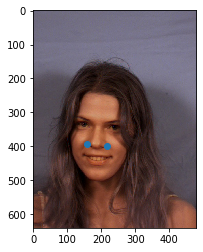

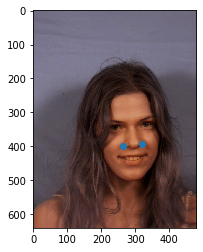

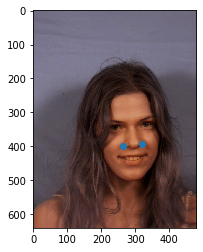

In [12]:
for i in range(3):
    plt.figure()
    plt.imshow(x_lr[i])
    plt.scatter(y_lr[i,:,0], y_lr[i,:,1])

In [6]:
x_crop, y_crop = augment_data(img, coords, rect, size=80)

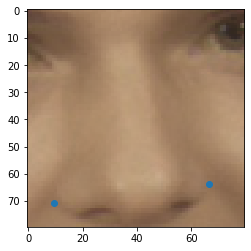

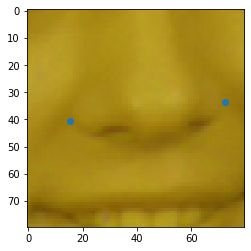

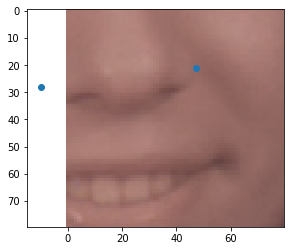

In [7]:
x_crop = x_crop.numpy()
y_crop = y_crop.numpy()
for i in range(3):
    plt.figure()
    plt.imshow(x_crop[i].astype(np.uint8))
    plt.scatter(y_crop[i,:,0], y_crop[i,:,1])

In [ ]:
def jitter(x, y, bbox, jitter=30, size=100):
    
    batch_size = tf.shape(x)[0]
    channels = tf.shape(x)[-1]
    
    offset = tf.random.uniform(shape=[batch_size, 2], minval=-jitter, maxval=jitter, dtype=tf.float32)
    new_bbox = bbox - offset
    new_bbox = tf.reshape(tf.keras.backend.repeat_elements(new_bbox, 2, 0), (batch_size, 2, 2))
    
    y_crop = y - new_bbox
    
    new_bbox = tf.cast(new_bbox, tf.int32)
    
    i = tf.constant(0)
    while_condition = lambda i: tf.less(i, batch_size)
    
    x_crop = tf.Variable(tf.zeros([batch_size, size, size, channels],
                      dtype=tf.float32))
    
    def crop(i):
        print(new_bbox[i])
        _x = tf.image.crop_to_bounding_box(
            x[i],
            offset_height=new_bbox[i][0][1],
            offset_width=new_bbox[i][0][0],
            target_width=size,
            target_height=size,        
        )
        x_crop[i].assign(_x)
        return [tf.add(i, 1)]
    
    tf.while_loop(while_condition, crop, [i])
    
    return x_crop, y_crop

In [ ]:
x_crop, y_crop = augment_data(img, coords, rect)

In [ ]:
i = tf.constant(0)

In [ ]:
tf.image.crop_to_bounding_box(
    x[i],
    offset_height=bbox[i][1],
    offset_width=bbox[i][1],
    target_width=100,
    target_height=100)

In [ ]:
img_crop, y_crop = jitter(img, coords, rect)
# img_crop = tf.image.random_brightness(img_crop, 0.2)

plt.imshow(img_crop.numpy().astype(np.uint8));
plt_np = y_crop.numpy();
plt.scatter(plt_np[:,0], plt_np[:,1]);

In [ ]:
def adjust_image(x):
    
    x_adjust = tf.image.random_brightness(x, 0.5)
    x_adjust = tf.image.random_contrast(x_adjust, 
                                        lower=0.4, upper=1)
    x_adjust = tf.image.random_hue(x_adjust, 0.1)
    x_adjust = tf.image.random_saturation(
        x_adjust, 0.5, 1.5)
    
    return x_adjust

In [ ]:
img_crop, y_crop = jitter(img, coords, rect)

# img_crop = tf.image.adjust_saturation(img_crop, 1.5)

In [ ]:
img_crop = tf.image.adjust_jpeg_quality(img_crop, 50)

In [ ]:
plt.imshow(img_crop.numpy().astype(np.uint8))

In [ ]:
plt.imshow(adjust_image(img_crop).numpy().astype(np.uint8))

In [ ]:
img_crop.numpy() - img_crop_org

In [ ]:
x = tf.image.adjust_brightness(x, delta=1)
plt.imshow(x.numpy().astype(np.uint8))

In [ ]:
plt.imshow(tf.image.adjust_saturation(img_crop, 0.7).numpy().astype(np.uint8))

In [ ]:
plt.imshow(tf.image.adjust_hue(img_crop, 1.02).numpy().astype(np.uint8))

In [ ]:
offset = tf.random.uniform(shape=[2], minval=-20, maxval=20, dtype=tf.int32)
offset

In [ ]:
new_rect = rect - offset

In [ ]:
offset = tf.broadcast_to(tf.cast(new_rect, dtype=tf.float32), [2, 2])
coords = coords - offset
coords

In [ ]:
img_crop = tf.image.crop_to_bounding_box(
    img,
    offset_height=new_rect[1],
    offset_width=new_rect[0],
    target_width=75,
    target_height=75,        
)

plt.imshow(img_crop.numpy().astype(np.uint8));
plt_np = coords.numpy();
plt.scatter(plt_np[:,0], plt_np[:,1]);

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 7))
ax.imshow(img);
ax.scatter(coords[:,0], coords[:,1]);
# ax.scatter(coords[39,0], coords[39,1]);
# ax.scatter(coords[43,0], coords[43,1]);

bbox = patches.Rectangle(
    rect[0,:],
    rect[1,0] - rect[0,0],
    rect[1,1] - rect[0,1],linewidth=1,edgecolor='r',facecolor='none')

ax.add_patch(bbox);

In [ ]:
np.random.randint(20, size=(2,))

In [ ]:
_rect = rect[0,:] - np.random.randint(low=-20, high=20, size=(2,))